# IDS #8 - Training and using Machine Learning models for Interaction

## Supervised Learning recap

## Training and inference
- Training can take a lot of time and ressources.
- Separation between training models and inference (making new predictions).
- We therefore need to save models.

## What is a model?
* Many definitions:
> The term ML model refers to the model artifact that is created by the training process. 
>
> <cite>[aws](https://docs.aws.amazon.com/machine-learning/latest/dg/training-ml-models.html)</cite>

### Weights and biases (linear function)
$\large y=mx+b$

### Weights and biases (neural networks)
![image](images/nn_weights.png)

### Models can be very valuable!
*  OpenAI's GPT model architecture is up for everybody, while the trained model was not released for various security reasons.
* The full trained model might be of very high value!
* Architectures are often shared through research, while trained models aren't.
* Lack of shared models are can lead to a reproducibility crisis in research [[1]](https://www.nature.com/articles/d41586-019-03895-5) [[2]](https://www.wired.com/story/artificial-intelligence-confronts-reproducibility-crisis/) [[3]](https://www.technologyreview.com/2020/11/12/1011944/artificial-intelligence-replication-crisis-science-big-tech-google-deepmind-facebook-openai/)

Price estimates:
* MobileNet on AWS (10,000 DKK)
* GPT-3 (12,000,000 USD)

## Pickle
![alt text](images/pickle.jpg "Title")

> Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object.
>
> -- [DataCamp](https://www.datacamp.com/community/tutorials/pickle-python-tutorial#what)

Pickling can be used for saving objects to disk. Can be useful for saving trained machine learning algorithms, complex data structures and dictionaries, lists and so.

Don't use pickling across various programming languages. Only unpickle data from a trusted source!

### Pickle vs JSON
* JSON is easily read by humans and is agnostic of programming languages.
* Pickled data cannot be read by humans and works only in Python.

### Using Pickle

In [15]:
import pickle
from PIL import Image

def some_special_function():
    print('something special')
    
image = Image.open('images/ruc_logo.png')

data = {
  "year": 1964,
  "function": some_special_function, # we can save functions
  "image": image # or complex data such as images!
}

filename = 'data.pkl'
outfile = open(filename,'wb') # 'wb' means write binary
pickle.dump(data,outfile)
outfile.close()

something special


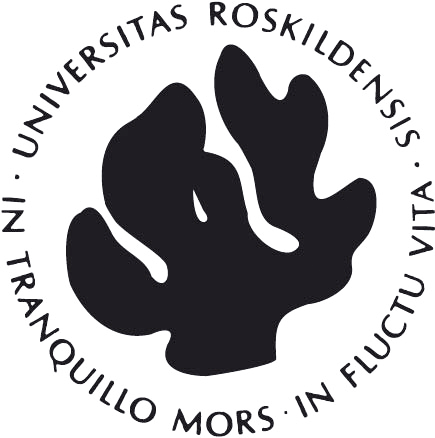

In [16]:
# reading from pickle file
infile = open(filename,'rb')
data = pickle.load(infile)
infile.close()
data['function']()
data['image']

#### Common formats for saving ML models
- SavedModel (Tensorflow)
- HDF5 (Tensorflow)
- TFJS (Tensorflow.js)
- state_dict (PyTorch)

# Teachable Machines!

### [Demo](https://teachablemachine.withgoogle.com/)

# Teachable Machines exercise start
* Train an image recognition model with 2+ classes using [Teachable Machine](https://teachablemachine.withgoogle.com/)
* Explore it's stability!
    * How does it handle different kinds of lighting, rotation, scaling?
    * Can you make it recognise different objects as the same class? (e.g. recognising different kinds of cups, pencils, hats, etc..)

### Transfer learning and teachable machines
* Image recognition built on pre-trained mobilenet
* Audio recognition built on pre-trained [Speech Command Recognizer](https://github.com/tensorflow/tfjs-models/tree/master/speech-commands)


_Source: [TM FAQ](https://teachablemachine.withgoogle.com/faq) </cite>_

### What is transfer learning?
* Find existing pre-trained model fitting for your task.
* Final layers of models

### Why transfer learn?
* Saves time
* Needing less data
* Often performing better

#### Tips:
* If the new dataset is very small, it’s better to train only the final layers of the network to avoid overfitting, keeping all other layers fixed. So remove the final layers of the pre-trained network. Add new layers . Retrain only the new layers.
* If the new dataset is very much large, retrain the whole network with initial weights from the pretrained model.